In [339]:
import pandas as pd
import numpy as np
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [340]:
winedf = pd.read_csv("WineQT.csv")

In [341]:
winedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [342]:
print(winedf.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [343]:
wine = winedf.drop('Id', axis=1)

In [344]:
display(wine)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [345]:
wine.shape

(1143, 12)

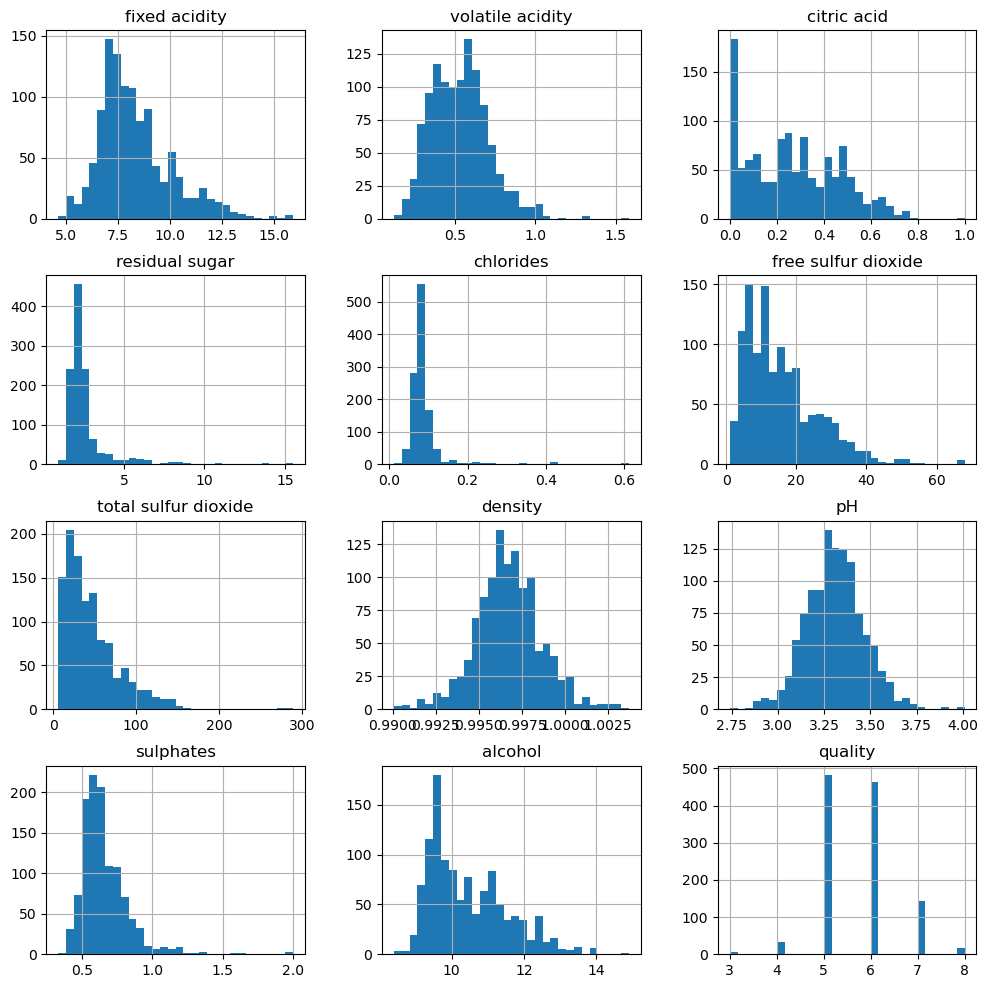

In [346]:
wine.hist(bins = 30, figsize = (12, 12));

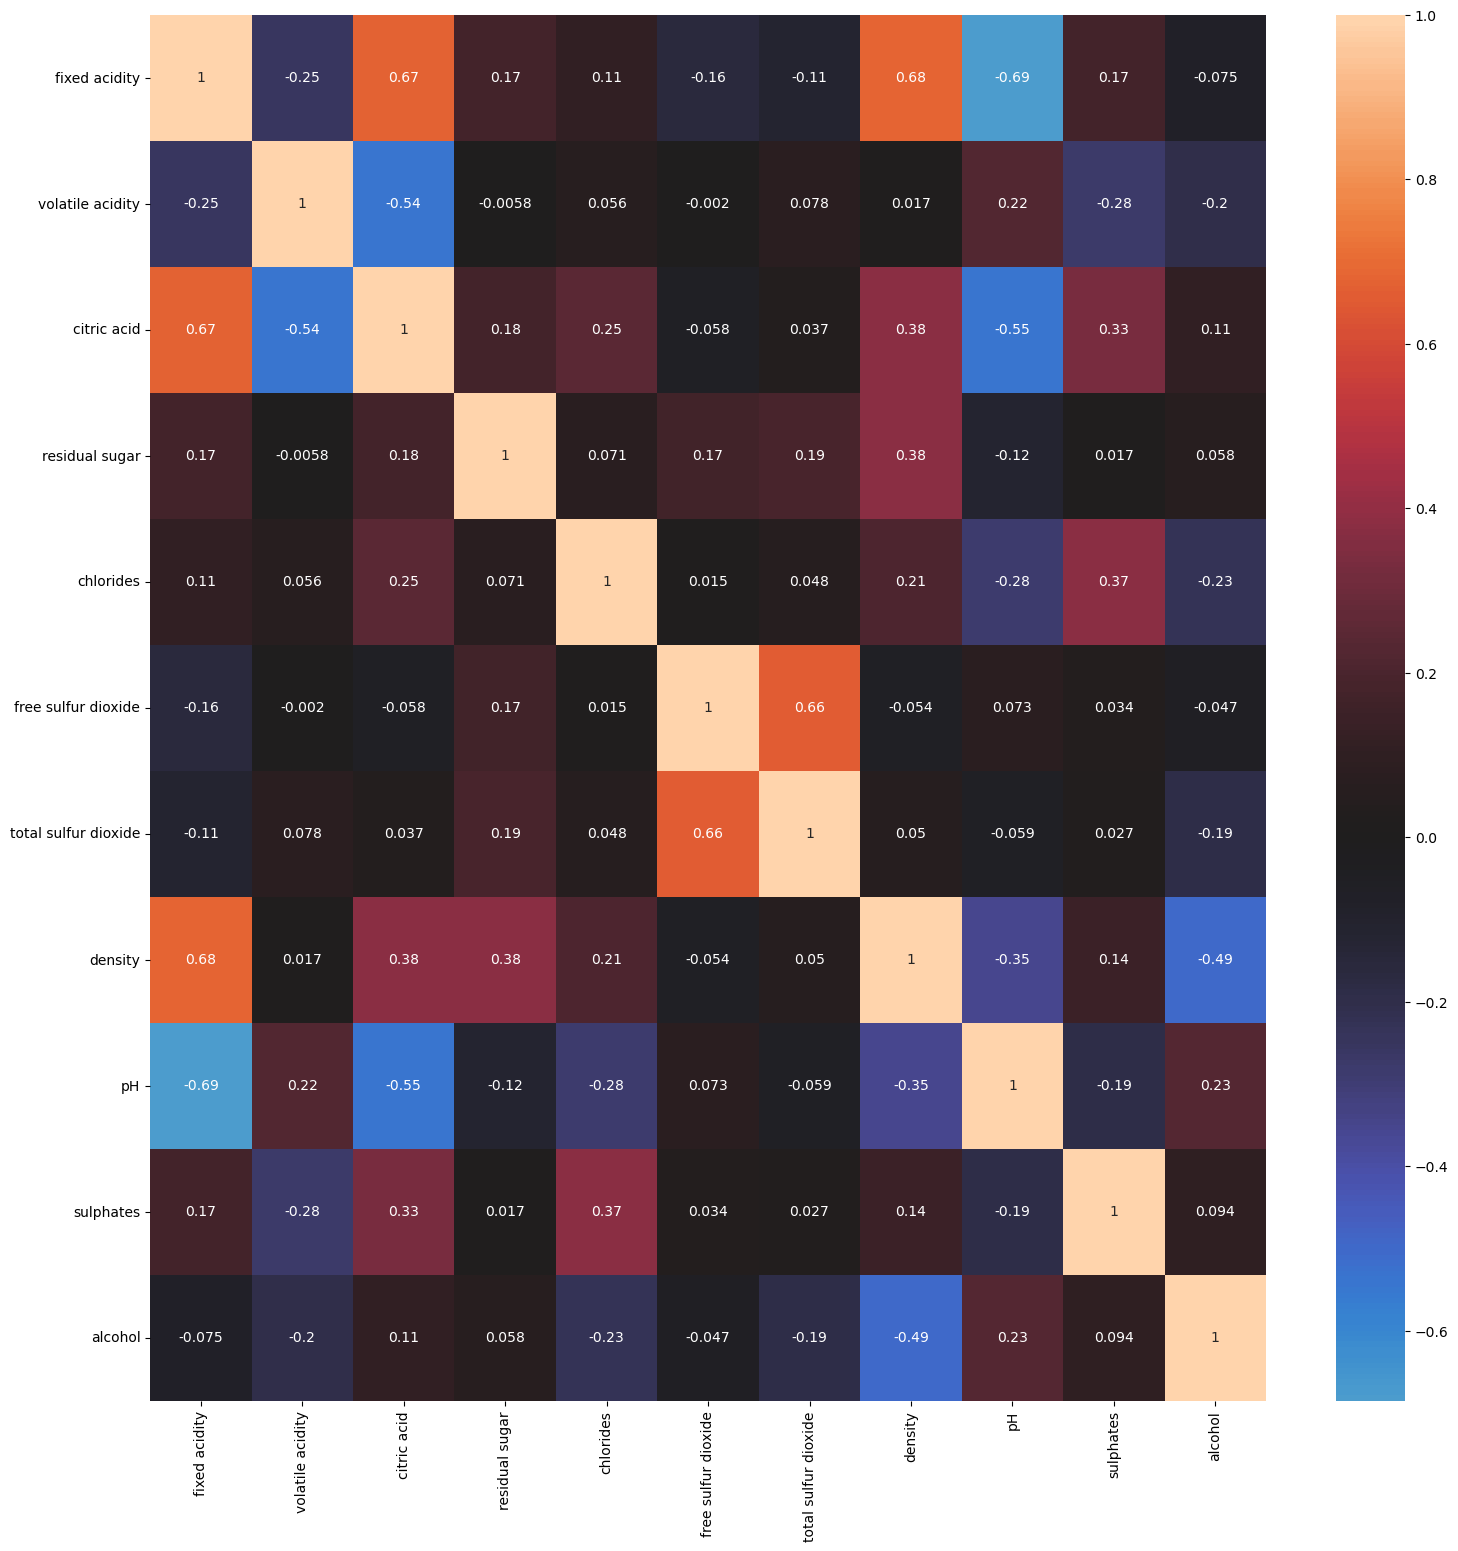

In [347]:
plt.figure(figsize=(18,18))
sns.heatmap(wine.select_dtypes(include=['float']).corr(),annot=True,center = 0)
plt.show()

In [348]:
# Binarize the 'quality' variable
threshold = 5  # Define threshold for 'good' quality
wine['quality_binary'] = wine['quality'].apply(lambda x: 1 if x > threshold else 0)

In [349]:
# Separate features (X) and target variable (y)
X = wine.drop(columns=['quality', 'quality_binary'])
y = wine['quality_binary']

# Check if all values in 'quality_binary' are numeric
print(wine['quality_binary'].unique())

[0 1]


In [350]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [351]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score

In [353]:
# Assuming 'quality' is the target variable
X = wine.drop(columns=['quality', 'quality_binary'])  # Features
y = wine['quality']  # Target variable

# Add a constant term to the features
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     61.49
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          4.26e-107
Time:                        19:17:47   Log-Likelihood:                -1106.7
No. Observations:                1143   AIC:                             2237.
Df Residuals:                    1131   BIC:                             2298.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   21.5495 

In [352]:
# Create a Decision Tree Classifier using Gini index
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)

# Train the model
clf_gini.fit(X_train, y_train)

# Predict the responses for test dataset
y_pred_dt = clf_gini.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_dt)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Print accuracy and confusion matrix
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.6812227074235808

Confusion Matrix:
 [[66 36]
 [37 90]]


In [354]:
# Assuming 'quality_binary' is the target variable
X = wine.drop(columns=['quality', 'quality_binary'])  # Features
y = wine['quality_binary']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
clf_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf_rf.fit(X_train, y_train)

# Predict the responses for test dataset
y_pred_rf = clf_rf.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Calculate confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Print accuracy and confusion matrix
print("\nAccuracy:", accuracy_rf)
print("\nConfusion Matrix:\n", conf_matrix_rf)


Accuracy: 0.7729257641921398

Confusion Matrix:
 [[78 24]
 [28 99]]
